In [1]:
import pandas as pd
import numpy as np
import requests
from bs4 import BeautifulSoup
import re
import csv
import os
import matplotlib.pyplot as plt
import seaborn as sb

from time import sleep

%matplotlib inline

# Course Curriculum Design

We will be using skills required by data scientists and analysts from Kaggle ML and Data Science Survey, job postings on indeed, ... Will also be using learning platforms like EdX, DataCamp, ...

### Using the Kaggle ML and Data Science Survey to identify the skills

This survey contains participant's answers to the questions. In this part, we will focus on fields that identify different technical skills:
* Programming languages (Q18)
* Vizualization tools (Q20)
* ML algorithms used on regular basis (Q24)
* ML tools used on regular basis (Q25)
* Computer vision metods used (Q26)
* NLP methods used (Q27)
* ML frameworks used (Q28)
* Cloud computing platforms (Q29)
* Big data/analytics products (Q31)
* ML products used (Q32)
* Relational databases products used (Q34)

**To do**: refine the skills obtained from Kaggle Survey to better match with job requirements later (after webscraping). The skills extracted from the Kaggle dataset are too specific

In [2]:
kaggle_data = pd.read_csv('multiple_choice_responses.csv')
kaggle_data.head()

C:\Users\merci\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3057: DtypeWarning: Columns (0,3,7,19,34,47,49,50,51,52,53,54,68,81,94,96,109,115,130,139,147,154,167,180,193,206,219,232,245) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Time from Start to Finish (seconds),Q1,Q2,Q2_OTHER_TEXT,Q3,Q4,Q5,Q5_OTHER_TEXT,Q6,Q7,...,Q34_Part_4,Q34_Part_5,Q34_Part_6,Q34_Part_7,Q34_Part_8,Q34_Part_9,Q34_Part_10,Q34_Part_11,Q34_Part_12,Q34_OTHER_TEXT
0,Duration (in seconds),What is your age (# years)?,What is your gender? - Selected Choice,What is your gender? - Prefer to self-describe...,In which country do you currently reside?,What is the highest level of formal education ...,Select the title most similar to your current ...,Select the title most similar to your current ...,What is the size of the company where you are ...,Approximately how many individuals are respons...,...,Which of the following relational database pro...,Which of the following relational database pro...,Which of the following relational database pro...,Which of the following relational database pro...,Which of the following relational database pro...,Which of the following relational database pro...,Which of the following relational database pro...,Which of the following relational database pro...,Which of the following relational database pro...,Which of the following relational database pro...
1,510,22-24,Male,-1,France,Master’s degree,Software Engineer,-1,"1000-9,999 employees",0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1
2,423,40-44,Male,-1,India,Professional degree,Software Engineer,-1,"> 10,000 employees",20+,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1
3,83,55-59,Female,-1,Germany,Professional degree,NaN,-1,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1
4,391,40-44,Male,-1,Australia,Master’s degree,Other,0,"> 10,000 employees",20+,...,NaN,NaN,NaN,NaN,NaN,Azure SQL Database,NaN,NaN,NaN,-1


In [3]:
# Helper function to turn skills into columns and encode them
def get_skills_df(df):
    for col in df.columns.values:
        skill = df[pd.notnull(df[col])][col].unique()[0] # get the selected choice for the corresponding col
        df.loc[:, col] = df.loc[:, col].map({skill: 1})
        df.rename(columns={col:skill.lower()}, inplace=True)
    df.fillna(0, inplace=True)
    
    return df

In [4]:
# programming languages, Q18 in the dataset (10 options)
languages = kaggle_data[['Q18_Part_1', 'Q18_Part_2', 'Q18_Part_3', 'Q18_Part_4', 'Q18_Part_5', 'Q18_Part_6', 'Q18_Part_7', 
                       'Q18_Part_8', 'Q18_Part_9', 'Q18_Part_10']]

languages.drop([0], inplace=True)
languages.head()

C:\Users\merci\Anaconda3\lib\site-packages\pandas\core\frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


,Q18_Part_1,Q18_Part_2,Q18_Part_3,Q18_Part_4,Q18_Part_5,Q18_Part_6,Q18_Part_7,Q18_Part_8,Q18_Part_9,Q18_Part_10
1,Python,R,SQL,NaN,NaN,Java,Javascript,NaN,NaN,MATLAB
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Python,R,SQL,NaN,NaN,NaN,NaN,NaN,Bash,NaN
5,Python,NaN,SQL,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
languages = get_skills_df(languages)
languages.head()

C:\Users\merci\Anaconda3\lib\site-packages\pandas\core\indexing.py:635: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item_labels[indexer[info_axis]]] = value
C:\Users\merci\Anaconda3\lib\site-packages\pandas\core\frame.py:4025: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)
C:\Users\merci\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas

,python,r,sql,c,c++,java,javascript,typescript,bash,matlab
1,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
5,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
languages.sum()/len(languages)

python        0.651265
r             0.232693
sql           0.331288
c             0.084800
c++           0.114419
java          0.114977
javascript    0.110260
typescript    0.019729
bash          0.103312
matlab        0.076888
dtype: float64

In [7]:
# Get Visualization tools used: Q20
viz_tools = kaggle_data[['Q20_Part_1', 'Q20_Part_2', 'Q20_Part_3', 'Q20_Part_4', 'Q20_Part_5', 'Q20_Part_6', 'Q20_Part_7', 
                       'Q20_Part_8', 'Q20_Part_9', 'Q20_Part_10']]

viz_tools.drop([0], inplace=True)
viz_tools = get_skills_df(viz_tools)
viz_tools.head()

,ggplot / ggplot2,matplotlib,altair,shiny,d3.js,plotly / plotly express,bokeh,seaborn,geoplotlib,leaflet / folium
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
5,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


In [8]:
viz_tools.sum()/len(viz_tools) #Idea: For each skill with percentage < 0.1%, remove it: probably not a crucial skills

 ggplot / ggplot2            0.212101
 matplotlib                  0.533347
 altair                      0.008470
 shiny                       0.063093
 d3.js                       0.054674
 plotly / plotly express     0.163159
 bokeh                       0.052899
 seaborn                     0.350205
 geoplotlib                  0.032662
 leaflet / folium            0.027895
dtype: float64

In [9]:
# Get ML algorithms used on a regular basis: Q24
ml_algo = kaggle_data[['Q24_Part_1', 'Q24_Part_2', 'Q24_Part_3', 'Q24_Part_4', 'Q24_Part_5', 'Q24_Part_6', 'Q24_Part_7', 
                       'Q24_Part_8', 'Q24_Part_9', 'Q24_Part_10']]

ml_algo.drop([0], inplace=True)
ml_algo = get_skills_df(ml_algo)
ml_algo.head()

,linear or logistic regression,decision trees or random forests,"gradient boosting machines (xgboost, lightgbm, etc)",bayesian approaches,evolutionary approaches,"dense neural networks (mlps, etc)",convolutional neural networks,generative adversarial networks,recurrent neural networks,"transformer networks (bert, gpt-2, etc)"
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
5,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [10]:
# Get ML tools used on a regular basis
ml_tools = kaggle_data[['Q25_Part_1', 'Q25_Part_2', 'Q25_Part_3', 'Q25_Part_4', 'Q25_Part_5', 'Q25_Part_6']]

ml_tools.drop([0], inplace=True)
ml_tools = get_skills_df(ml_tools)
ml_tools.head()

,"automated data augmentation (e.g. imgaug, albumentations)","automated feature engineering/selection (e.g. tpot, boruta_py)","automated model selection (e.g. auto-sklearn, xcessiv)","automated model architecture searches (e.g. darts, enas)","automated hyperparameter tuning (e.g. hyperopt, ray.tune)","automation of full ml pipelines (e.g. google automl, h20 driverless ai)"
1,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,1.0
5,0.0,0.0,0.0,0.0,0.0,0.0


In [11]:
# Get Computer Vision methods used on a regular basis
computer_vision = kaggle_data[['Q26_Part_1', 'Q26_Part_2', 'Q26_Part_3', 'Q26_Part_4', 'Q26_Part_5']]

computer_vision.drop([0], inplace=True)
computer_vision = get_skills_df(computer_vision)
computer_vision.head()

,"general purpose image/video tools (pil, cv2, skimage, etc)","image segmentation methods (u-net, mask r-cnn, etc)","object detection methods (yolov3, retinanet, etc)","image classification and other general purpose networks (vgg, inception, resnet, resnext, nasnet, efficientnet, etc)","generative networks (gan, vae, etc)"
1,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,1.0,0.0
5,0.0,0.0,0.0,0.0,0.0


In [12]:
# Get NLP methods used on a regular basis
nlp = kaggle_data[['Q27_Part_1', 'Q27_Part_2', 'Q27_Part_3', 'Q27_Part_4']]

nlp.drop([0], inplace=True)
nlp = get_skills_df(nlp)
nlp.head()

,"word embeddings/vectors (glove, fasttext, word2vec)","encoder-decorder models (seq2seq, vanilla transformers)","contextualized embeddings (elmo, cove)","transformer language models (gpt-2, bert, xlnet, etc)"
1,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0


In [13]:
# Get ML frameworks used: Q28
ml_frameworks = kaggle_data[['Q28_Part_1', 'Q28_Part_2', 'Q28_Part_3', 'Q28_Part_4', 'Q28_Part_5', 'Q28_Part_6', 'Q28_Part_7', 'Q28_Part_8', 'Q28_Part_9', 'Q28_Part_10']]

ml_frameworks.drop([0], inplace=True)
ml_frameworks = get_skills_df(ml_frameworks)
ml_frameworks.head()

,scikit-learn,tensorflow,keras,randomforest,xgboost,pytorch,caret,lightgbm,spark mlib,fast.ai
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
5,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0


In [14]:
# Get cloud computing platforms used: Q29
cloud_computing = kaggle_data[['Q29_Part_1', 'Q29_Part_2', 'Q29_Part_3', 'Q29_Part_4', 'Q29_Part_5', 'Q29_Part_6',
                               'Q29_Part_7','Q29_Part_8', 'Q29_Part_9', 'Q29_Part_10']]

cloud_computing.drop([0], inplace=True)
cloud_computing = get_skills_df(cloud_computing)
cloud_computing.head(10)

,google cloud platform (gcp),amazon web services (aws),microsoft azure,ibm cloud,alibaba cloud,salesforce cloud,oracle cloud,sap cloud,vmware cloud,red hat cloud
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [15]:
# Get big data/ analytics products used: Q31
big_data = kaggle_data[['Q31_Part_1', 'Q31_Part_2', 'Q31_Part_3', 'Q31_Part_4', 'Q31_Part_5', 'Q31_Part_6',
                               'Q31_Part_7','Q31_Part_8', 'Q31_Part_9', 'Q31_Part_10']]

big_data.drop([0], inplace=True)
big_data = get_skills_df(big_data)
big_data.head(10)

,google bigquery,aws redshift,databricks,aws elastic mapreduce,teradata,microsoft analysis services,google cloud dataflow,aws athena,aws kinesis,google cloud pub/sub
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
7,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [16]:
# Get ML products used: Q32
ml_products = kaggle_data[['Q32_Part_1', 'Q32_Part_2', 'Q32_Part_3', 'Q32_Part_4', 'Q32_Part_5', 'Q32_Part_6',
                               'Q32_Part_7','Q32_Part_8', 'Q32_Part_9', 'Q32_Part_10']]

ml_products.drop([0], inplace=True)
ml_products = get_skills_df(ml_products)
ml_products.head(10)

,sas,cloudera,azure machine learning studio,google cloud machine learning engine,google cloud vision,google cloud speech-to-text,google cloud natural language,rapidminer,google cloud translation,amazon sagemaker
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
7,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [17]:
# Get database products used: Q34
db_products = kaggle_data[['Q34_Part_1', 'Q34_Part_2', 'Q34_Part_3', 'Q34_Part_4', 'Q34_Part_5', 'Q34_Part_6',
                               'Q34_Part_7','Q34_Part_8', 'Q34_Part_9', 'Q34_Part_10']]

db_products.drop([0], inplace=True)
db_products = get_skills_df(db_products)
db_products.head(10)

,mysql,postgressql,sqlite,microsoft sql server,oracle database,microsoft access,aws relational database service,aws dynamodb,azure sql database,google cloud sql
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
7,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [18]:
# Combine all the skills dataframe into one
kaggle_skills = pd.concat([languages, viz_tools, ml_algo, computer_vision, nlp, ml_frameworks, cloud_computing, 
                          big_data, ml_products, db_products], axis=1)
kaggle_skills.head(10)

,python,r,sql,c,c++,java,javascript,typescript,bash,matlab,...,mysql,postgressql,sqlite,microsoft sql server,oracle database,microsoft access,aws relational database service,aws dynamodb,azure sql database,google cloud sql
1,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
5,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
7,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [19]:
kaggle_skills.to_csv('./kaggle_skills.csv', index=True)

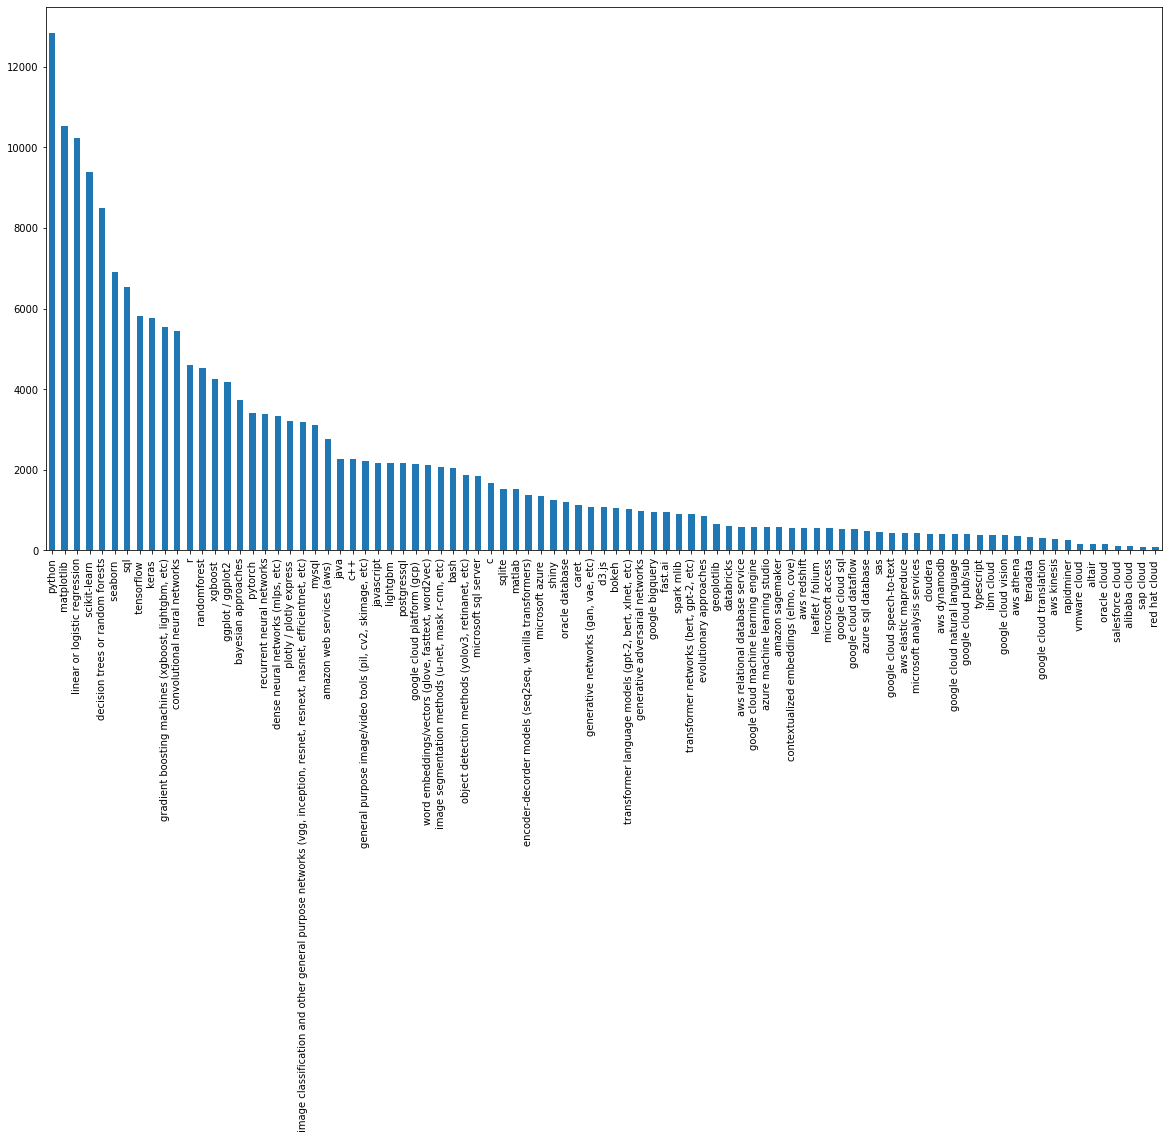

In [20]:
plt.figure(figsize=(20,10))
ax = kaggle_skills.sum().sort_values(ascending=False).plot(kind="bar")
plt.show()

### Indeed

Used the web scraping code from group 15

In this part, we want to identify which skills are required for data analysts/scientists in job postings on indeed.

To identify the most common skills from these job postings, we first need define which skills we'd expect to find in a data scientist/analyst. The skills extracted from the Kaggle ML and datascience survey data (2018) will be used.

In [21]:
# Scrape indeed website, and store results in dataframe job_info

base = 'http://ca.indeed.com'
# Indeed displays ~10-15 jobs on each page, while each job itself can be identify as a page.
# So we search jobs every 10 pages.
# For 1000+ jobs, we need to go through 100+ pages with 10+ jobs on each page. 
import requests
pages = list(range(0,1100,10))
#pages = list(range(0,100,10))

In [22]:
def get_jobs():
    job_info = pd.DataFrame()
    for page in pages:
      result = requests.get("https://ca.indeed.com/jobs?q=data+analyst%2C+data+scientist&start="+str(page)).text
      soup = BeautifulSoup(result, 'lxml')

      for jobs in soup.find_all(class_ = "result"): 

        try:
          position_title = jobs.find('a', class_='jobtitle turnstileLink').text.strip()
        except:
          position_title = None

        try:
          employer = jobs.find('span', class_='company').text.strip()
        except:
          employer = None

        try:
          location = jobs.find('span', class_='location').text.strip()
        except:
          location = None

        try:
          salary = jobs.find('span', class_ = 'salaryText').text.strip()
        except:
          salary = None

        try:
          link = base + jobs.find('a').attrs['href']
        except:
          link = None

        job_info = job_info.append({
            'position_title': position_title, 
            'employer': employer,
            'location': location,
            'salary': salary,
            'link': link}, ignore_index = True)

    #Delect dulicate jobs
    job_info = job_info.drop_duplicates(['link'], keep='first')
    
    job_info["position_title"] = job_info["position_title"].replace('', np.nan)
    job_info = job_info.dropna(subset=['position_title'])
    
    return job_info
    
    

In [23]:
def indeed_job_descriptions():
    descriptions = []
    
    for i in range(len(job_info)):
        link = requests.get(job_info.loc[i, 'link'])
        soup = BeautifulSoup(link.text, "lxml")
        try:
            text = soup.find('div', class_ = 'jobsearch-jobDescriptionText').text.strip().lower()
            # Preprocessing, replace punctuations, and replace multiple spaces
            #print("got description for job ", str(i + 1))
            text = re.sub(r'\,', ' ', text) 
            text = re.sub('/', ' ', text) 
            text = re.sub(r'\(', ' ', text) 
            text = re.sub(r'\)', ' ', text) 
            text = re.sub(' +',' ',text)
            
        except:
            #print("got an error!!! for job ", str(i + 1))
            text = ""
            
        descriptions.append(text)
        
        sleep(1)
        
    job_info['description'] = descriptions
    

In [24]:
#Takes long to run. Commented out since job postings details will be saved to csv file later
#job_info = get_jobs()
#indeed_job_descriptions()
#job_info.to_csv('./indeed_jobs.csv', index=True)

In [25]:
#skills = kaggle_skills.columns.values

In [26]:
# Use skills from 2018 kaggle data
skills_df = pd.read_csv('kaggle_skills_2018.csv')
skills = skills_df.loc[:, 'Unnamed: 0'].values
skills = set([skill.strip().lower() for skill in skills])
skills.remove('other')
skills.remove('none')

In [27]:
# Read in the indeed job postings details
job_info = pd.read_csv('indeed_jobs.csv')
job_info.drop(['Unnamed: 0'], axis=1, inplace=True)

# Drop rows without description
job_info.replace("", np.nan, inplace=True)
job_info.dropna(subset = ['description'], inplace=True)
job_info.reset_index(drop=True, inplace=True)
job_info.head()

,employer,link,location,position_title,salary,description
0,STONE TILE INTERNATIONAL,http://ca.indeed.com/pagead/clk?mo=r&ad=-6NYlb...,NaN,Replenishment Analyst,NaN,position: replenishment analystreports to: sen...
1,exactEarth Ltd.,http://ca.indeed.com/pagead/clk?mo=r&ad=-6NYlb...,NaN,Data Scientist,NaN,about usexactearth is a data services company ...
2,Biolab Pharma,http://ca.indeed.com/pagead/clk?mo=r&ad=-6NYlb...,NaN,Associate Scientist Formulation Development,"$54,000 - $66,000 a year",the formulation development associate scientis...
3,Canada Infrastructure Bank,http://ca.indeed.com/pagead/clk?mo=r&ad=-6NYlb...,NaN,"Analyst, Investments",NaN,headquartered in toronto the canada infrastruc...
4,Reconnect Community Health Services,http://ca.indeed.com/pagead/clk?mo=r&ad=-6NYlb...,NaN,Decision Support Junior Analyst,$17 an hour,positions available: 3compensation: $17.00 per...


In [28]:
for skill in skills:
  job_info[skill] = np.zeros(len(job_info))

job_info.reset_index(drop=True, inplace=True)
job_info.head()

,employer,link,location,position_title,salary,description,google app engine,amazon comprehend,azure face api,google cloud automl,...,rapidminer,aws elastic mapreduce,google cloud video intelligence api,microsoft analysis services,dataversity,ibm cloud virtual servers,keras,ggplot2,google cloud sql,google colab
0,STONE TILE INTERNATIONAL,http://ca.indeed.com/pagead/clk?mo=r&ad=-6NYlb...,NaN,Replenishment Analyst,NaN,position: replenishment analystreports to: sen...,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,exactEarth Ltd.,http://ca.indeed.com/pagead/clk?mo=r&ad=-6NYlb...,NaN,Data Scientist,NaN,about usexactearth is a data services company ...,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Biolab Pharma,http://ca.indeed.com/pagead/clk?mo=r&ad=-6NYlb...,NaN,Associate Scientist Formulation Development,"$54,000 - $66,000 a year",the formulation development associate scientis...,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Canada Infrastructure Bank,http://ca.indeed.com/pagead/clk?mo=r&ad=-6NYlb...,NaN,"Analyst, Investments",NaN,headquartered in toronto the canada infrastruc...,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Reconnect Community Health Services,http://ca.indeed.com/pagead/clk?mo=r&ad=-6NYlb...,NaN,Decision Support Junior Analyst,$17 an hour,positions available: 3compensation: $17.00 per...,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [29]:
def extract_skills():
    for i in range(len(job_info)):
        for s in skills :
            # This is specifically for C++, escape the ++. Convert C++ to C\+\+
            if any(x in s for x in ['+']):
                skill = re.escape(s)
            else:
                skill = s
            description = job_info.loc[i, 'description']
            matching = re.search(r'(?:^|(?<=\s))' + skill + r'(?=\s|$)',description)
            
            if matching:
                job_info[s][i] = 1
                #print("matched skill ",s, "for job ",str(i+1))

In [30]:
extract_skills()
job_info.head()

C:\Users\merci\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]


,employer,link,location,position_title,salary,description,google app engine,amazon comprehend,azure face api,google cloud automl,...,rapidminer,aws elastic mapreduce,google cloud video intelligence api,microsoft analysis services,dataversity,ibm cloud virtual servers,keras,ggplot2,google cloud sql,google colab
0,STONE TILE INTERNATIONAL,http://ca.indeed.com/pagead/clk?mo=r&ad=-6NYlb...,NaN,Replenishment Analyst,NaN,position: replenishment analystreports to: sen...,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,exactEarth Ltd.,http://ca.indeed.com/pagead/clk?mo=r&ad=-6NYlb...,NaN,Data Scientist,NaN,about usexactearth is a data services company ...,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Biolab Pharma,http://ca.indeed.com/pagead/clk?mo=r&ad=-6NYlb...,NaN,Associate Scientist Formulation Development,"$54,000 - $66,000 a year",the formulation development associate scientis...,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Canada Infrastructure Bank,http://ca.indeed.com/pagead/clk?mo=r&ad=-6NYlb...,NaN,"Analyst, Investments",NaN,headquartered in toronto the canada infrastruc...,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Reconnect Community Health Services,http://ca.indeed.com/pagead/clk?mo=r&ad=-6NYlb...,NaN,Decision Support Junior Analyst,$17 an hour,positions available: 3compensation: $17.00 per...,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [31]:
job_info.to_csv('./indeed_skills.csv', index=True)

In [32]:
indeed_skills = job_info.drop(['employer', 'link', 'location', 'position_title', 'salary', 'description'], axis=1)

In [34]:
indeed_skills.head()

,google app engine,amazon comprehend,azure face api,google cloud automl,prophet,cntk,aws batch,shiny,google cloud datastore,jupyter/ipython,...,rapidminer,aws elastic mapreduce,google cloud video intelligence api,microsoft analysis services,dataversity,ibm cloud virtual servers,keras,ggplot2,google cloud sql,google colab
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


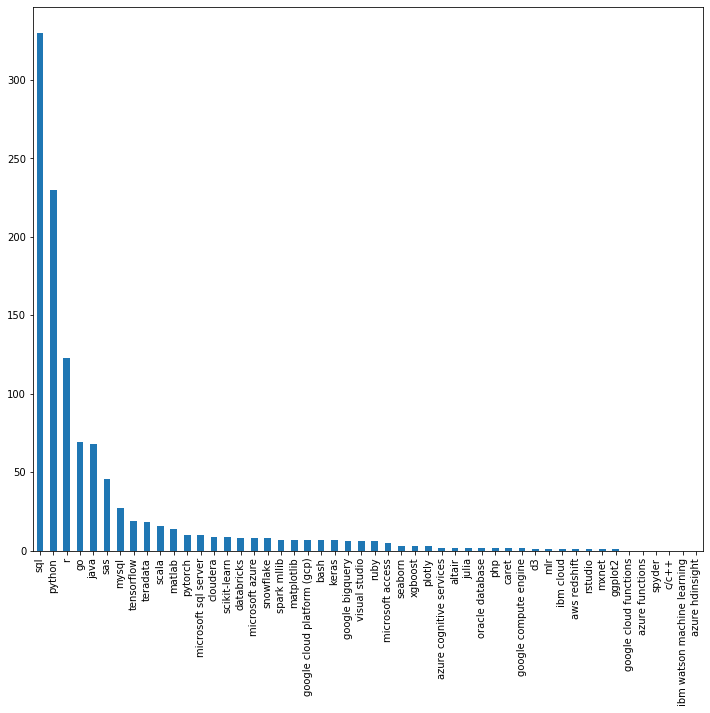

In [35]:
plt.figure(figsize=(12,10))
indeed_skills.sum().sort_values(ascending=False)[:50].plot(kind="bar")

## Clustering of skills

Use hierachircal clustering to cluster the skills identified above. Each cluster could give represent closely related skills according to the dataset. Thus, the clusters can be used as topic (or give an idea of  topic) that can be added on the curriculum and elements of the cluster can inform the subtopics. (or something along these lines)

### Kaggle data

In [36]:
from sklearn.preprocessing import normalize
import scipy.cluster.hierarchy as sch
from scipy import zeros as sci_zeros
from scipy.spatial.distance import euclidean
from scipy.cluster.hierarchy import dendrogram

%matplotlib inline

In [37]:
kaggle_skills = pd.read_csv('kaggle_skills.csv')
kaggle_skills = kaggle_skills.drop(['Unnamed: 0'], axis=1)

In [47]:
from sklearn.cluster import AgglomerativeClustering

# Helper function to run clustering
def run_clustering(df, n_clusters):
    
    df = pd.DataFrame(normalize(df), columns=df.columns)
    df = df.transpose()
    df.index.name = 'words'
    
    model = AgglomerativeClustering(n_clusters=n_clusters, affinity='euclidean',
                                    compute_full_tree=True,linkage='ward')
    clusters = model.fit_predict(df)
    df["cluster_name"] = clusters

    df.reset_index(inplace=True)
    cluster_list = len(df["cluster_name"].unique())
    
    #Retrieve the elements of each cluster
    for cluster_number in range(cluster_list):
        print("="*20)
        print("Cluster %d: " % cluster_number)
        df_temp = df[df['cluster_name'] == cluster_number]
        df_temp = df_temp.drop(columns = 'cluster_name')
        print("Cluster size: ", len(df_temp))
        print(','.join(df_temp.words.tolist()))

In [48]:
run_clustering(kaggle_skills, 10)

Cluster 0: 
Cluster size:  12
c,c++,java,javascript,bash,matlab, plotly / plotly express ,bayesian approaches, google cloud platform (gcp) , amazon web services (aws) ,mysql,postgressql
Cluster 1: 
Cluster size:  56
typescript, altair , shiny , d3.js , bokeh , geoplotlib , leaflet / folium ,evolutionary approaches,generative adversarial networks,recurrent neural networks,transformer networks (bert, gpt-2, etc),generative networks (gan, vae, etc),word embeddings/vectors (glove, fasttext, word2vec),encoder-decorder models (seq2seq, vanilla transformers),contextualized embeddings (elmo, cove),transformer language models (gpt-2, bert, xlnet, etc), caret , lightgbm , spark mlib , fast.ai , microsoft azure , ibm cloud , alibaba cloud , salesforce cloud , oracle cloud , sap cloud , vmware cloud , red hat cloud ,google bigquery,aws redshift,databricks,aws elastic mapreduce,teradata,microsoft analysis services,google cloud dataflow,aws athena,aws kinesis,google cloud pub/sub,sas,cloudera,azure 

* From the bar chart earlier, python seems to be the most used programming language and from above, it belongs to its own cluster. We can decide to use python as the primary language for the course

* Cluster 2 looks like python libraries. We can add that to the curriculum

* Cluster 3 seems to be about Neural Networks. We can decide to add an intro to NN

* Cluster 4 & 5 seem to be supervised learning algorithms, so we can add that to the syllabus (with subtopics of linear or logistic regression,decision trees or random forests, xgboost

* Ignore cluster 8, because we decided to go with python

* Cluster 9: keep as NN libraries. Can combine this with cluster 3

### Indeed

In [43]:
# Try for indeed skills

#Remove skills that are not found in indeed job postings
indeed_df = indeed_skills.drop(columns=indeed_skills.columns[indeed_skills.sum()==0])
indeed_df.head()

,r,mysql,spark mllib,php,seaborn,plotly,databricks,xgboost,bash,pytorch,...,go,microsoft access,d3,scala,visual studio,snowflake,java,ibm cloud,keras,ggplot2
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [44]:
run_clustering(indeed_df, 5)

Cluster 0: 
Cluster size:  40
mysql,spark mllib,php,seaborn,plotly,databricks,xgboost,bash,pytorch,julia,matplotlib,rstudio,caret,cloudera,teradata,google compute engine,mxnet,mlr,google cloud platform (gcp),azure cognitive services,altair,oracle database,google bigquery,sas,scikit-learn,tensorflow,microsoft sql server,aws redshift,microsoft azure,matlab,ruby,microsoft access,d3,scala,visual studio,snowflake,java,ibm cloud,keras,ggplot2
Cluster 1: 
Cluster size:  1
go
Cluster 2: 
Cluster size:  1
python
Cluster 3: 
Cluster size:  1
sql
Cluster 4: 
Cluster size:  1
r
